In [2]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
extended_stopwords = set(stopwords.words('english')) | {
    'he', 'she', 'it', 'they', 'we', 'you', 'I', 'me', 'us', 'them', 
    'him', 'her', 'his', 'hers', 'theirs', 'our', 'your', 'my', 'mine', 
    'yourself', 'myself', 'ourselves', 'yourselves', 'themselves', 
    'himself', 'herself', 'itself', 'who', 'whom', 'whose', 'which', 'that',
    'this', 'these', 'those'
}

In [39]:
# Dictionary of known concatenated words
concatenated_words_dict = {
    'womenaged': 'women aged',
    'placewomen': 'place women',
    'workwomen' : 'work women',
    'overwomen' : 'over women'
}

In [40]:
def handle_concatenated_words(word, concatenated_dict):
    return concatenated_dict.get(word, word)

In [56]:
def clean_and_lemmatize_text(text):
    # Lowercase the text
    text = text.lower()

    # Replace all forms of dashes and hyphens with a space
    text = re.sub(r'[-–—]+', ' ', text)

    # Separate numbers and words concatenated together
    text = re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', text)
    text = re.sub(r'([a-zA-Z]+)(\d+)', r'\1 \2', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Handle concatenated words, then lemmatize and remove stopwords
    processed_tokens = [lemmatizer.lemmatize(handle_concatenated_words(word, concatenated_words_dict)) for word in tokens if word not in extended_stopwords]

    # Remove extra spaces
    cleaned_text = ' '.join(processed_tokens)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text

In [59]:
text = "There were 18women and 20men in the competition."
clean_text = clean_and_lemmatize_text(text)
print(clean_text)

18 woman 20 men competition


In [60]:
source_directory = '/Users/shaistasyeda/Desktop/DataSet/merged-files'

In [61]:
import os
destination_directory = 'cleaned_files_1'
os.makedirs(destination_directory, exist_ok=True) 

In [62]:
# Iterate over each file in the source directory
for file_name in os.listdir(source_directory):
    if file_name.endswith('.txt'):
        file_path = os.path.join(source_directory, file_name)
        
        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
        
        # Clean the data
        cleaned_data = clean_and_lemmatize_text(data)
        
        # Define the path for the cleaned file
        cleaned_file_path = os.path.join(destination_directory, f"cleaned_{file_name}")
        
        # Save the cleaned data
        with open(cleaned_file_path, 'w', encoding='utf-8') as file:
            file.write(cleaned_data)
        
        print(f"Cleaned file saved as {cleaned_file_path}")

Cleaned file saved as cleaned_files_1/cleaned_1984_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1890_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1919_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1858_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1998_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1905_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1932_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1811_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1826_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1967_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1950_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1873_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1844_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1855_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1862_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1941_merged.txt
Cleaned 

Cleaned file saved as cleaned_files_1/cleaned_1966_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1951_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1872_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1845_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1999_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1988_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1854_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1863_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1940_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1977_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1836_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1922_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1915_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1880_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1994_merged.txt
Cleaned file saved as cleaned_files_1/cleaned_1848_merged.txt
Cleaned 

In [63]:
import os
import fasttext
import nltk
from nltk.tokenize import sent_tokenize

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaistasyeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
tokenized_directory = 'cleaned_files_1'

In [66]:
combined_file_path = '/Users/shaistasyeda/Desktop/DataSet/combined_tokenized.txt'

In [67]:
# Combine all tokenized files into one large file
with open(combined_file_path, 'w', encoding='utf-8') as combined_file:
    for file_name in os.listdir(tokenized_directory):
        if file_name.endswith('.txt'):
            file_path = os.path.join(tokenized_directory, file_name)
            
            # Read each file and append its content to the combined file
            with open(file_path, 'r', encoding='utf-8') as file:
                combined_file.write(file.read() + '\n')

print(f"Combined file created at {combined_file_path}")

Combined file created at /Users/shaistasyeda/Desktop/DataSet/combined_tokenized.txt


In [68]:
# Train the fastText model on the combined file
model = fasttext.train_unsupervised(combined_file_path, model='skipgram')
# Save the trained model
model_path = '/Users/shaistasyeda/Desktop/DataSet/fasttext_model_new.bin'
model.save_model(model_path)

print(f"fastText model trained and saved to {model_path}")

Read 102M words
Number of words:  99895
Number of labels: 0
Progress: 100.0% words/sec/thread:   71167 lr:  0.000000 avg.loss:  0.443423 ETA:   0h 0m 0s 87.1% words/sec/thread:   71088 lr:  0.006437 avg.loss:  0.507168 ETA:   0h 2m12s


fastText model trained and saved to /Users/shaistasyeda/Desktop/DataSet/fasttext_model_new.bin


In [69]:
similar_words = model.get_nearest_neighbors('woman', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7447376251220703 women
0.7246029376983643 female
0.694318950176239 marriedwomen
0.689653217792511 men
0.6832957863807678 womanhood
0.6819168925285339 womenfolk
0.6800893545150757 male
0.6746634244918823 unmarried
0.6728211641311646 adult
0.6716204881668091 childbearing


In [70]:
analogy = model.get_analogies('king', 'man', 'queen', k=1)
for word, similarity in analogy:
    print(word, similarity)

0.5839092135429382 elizabeth


In [71]:
similar_words = model.get_nearest_neighbors('man', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7591094970703125 men
0.7052745223045349 suppose
0.6928899884223938 surely
0.680347740650177 one
0.6780292987823486 every
0.6763904690742493 supposed
0.6748271584510803 irishwoman
0.6712268590927124 englishwoman
0.6685264110565186 really
0.6678933501243591 father


In [79]:
text_file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_files_1/merged_1800_1849.txt'

# Train a fastText model
model = fasttext.train_unsupervised(text_file_path, model='skipgram')

# Save the trained model
model_path = 'fasttext_model_1849.bin'
model.save_model(model_path)

print(f"Model trained and saved to {model_path}")

Read 9M words
Number of words:  22155
Number of labels: 0
Progress: 100.0% words/sec/thread:   54857 lr:  0.000022 avg.loss:  2.069668 ETA:   0h 0m 0s

Model trained and saved to fasttext_model_1849.bin


Progress: 100.0% words/sec/thread:   54842 lr:  0.000000 avg.loss:  2.069920 ETA:   0h 0m 0s


In [80]:
similar_words = model.get_nearest_neighbors('woman', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.6953782439231873 child
0.6842429041862488 husbandman
0.6666134595870972 scotchwoman
0.6374983787536621 womb
0.6339884996414185 girl
0.6255537271499634 husband
0.6230942010879517 young
0.6200757026672363 husbanded
0.6046341061592102 female
0.6040182113647461 trowsers


In [81]:
similar_words = model.get_nearest_neighbors('man', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7890785336494446 never
0.7784768342971802 ever
0.770086407661438 could
0.737967312335968 thing
0.7307202816009521 say
0.7187234163284302 men
0.7100488543510437 really
0.7014883756637573 one
0.698104739189148 indeed
0.6849561929702759 every


In [84]:
analogy = model.get_analogies('king', 'man', 'queen', k=1)
for word, similarity in analogy:
    print(word, similarity)

0.6074321269989014 anne


In [85]:
text_file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_files_1/merged_1850_1920.txt'

# Train a fastText model
model = fasttext.train_unsupervised(text_file_path, model='skipgram')

# Save the trained model
model_path = 'fasttext_model_1920.bin'
model.save_model(model_path)

print(f"Model trained and saved to {model_path}")

Read 23M words
Number of words:  34127
Number of labels: 0
Progress: 100.0% words/sec/thread:   51643 lr:  0.000000 avg.loss:  1.203126 ETA:   0h 0m 0s 54.4% words/sec/thread:   50689 lr:  0.022804 avg.loss:  1.876559 ETA:   0h 2m31s 60.9% words/sec/thread:   50981 lr:  0.019575 avg.loss:  1.761130 ETA:   0h 2m 8s


Model trained and saved to fasttext_model_1920.bin


# suffragette means a woman seeking the right to vote through organized protest.

In [86]:
similar_words = model.get_nearest_neighbors('woman', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7199098467826843 fiancées
0.6916109919548035 women
0.6591169238090515 married
0.655926525592804 female
0.644893229007721 irishwoman
0.6409128904342651 worker
0.6236534714698792 person
0.6235905885696411 man
0.6221939921379089 suffragette
0.6192792654037476 adult


In [87]:
similar_words = model.get_nearest_neighbors('man', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7790971994400024 men
0.7223900556564331 person
0.694073498249054 hireling
0.6855025291442871 every
0.66920405626297 licked
0.6661655306816101 surely
0.6633811593055725 case
0.6503986120223999 many
0.6449174880981445 one
0.644869863986969 picked


In [88]:
analogy = model.get_analogies('king', 'man', 'queen', k=1)
for word, similarity in analogy:
    print(word, similarity)

0.5916923880577087 anne


In [89]:
text_file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_files_1/merged_1921_1970.txt'

# Train a fastText model
model = fasttext.train_unsupervised(text_file_path, model='skipgram')

# Save the trained model
model_path = 'fasttext_model_1970.bin'
model.save_model(model_path)

print(f"Model trained and saved to {model_path}")

Read 27M words
Number of words:  41684
Number of labels: 0
Progress: 100.0% words/sec/thread:   51354 lr:  0.000000 avg.loss:  1.035489 ETA:   0h 0m 0s 53.1% words/sec/thread:   51302 lr:  0.023449 avg.loss:  1.666435 ETA:   0h 3m 0s 1.483058 ETA:   0h 2m27s


Model trained and saved to fasttext_model_1970.bin


# Charwoman means a woman employed to clean houses or offices.

In [90]:
similar_words = model.get_nearest_neighbors('woman', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7669793367385864 men
0.727089524269104 charwoman
0.7151160836219788 young
0.6847538948059082 childless
0.6748203635215759 policewoman
0.6726569533348083 womanly
0.6689029335975647 unmarried
0.6667106747627258 wife
0.6663983464241028 man
0.6653931736946106 female


In [91]:
similar_words = model.get_nearest_neighbors('man', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7702977657318115 men
0.6844482421875 charwoman
0.6663983464241028 woman
0.6410592794418335 breadwinner
0.6375285983085632 person
0.6359814405441284 wife
0.6223604083061218 people
0.6214350461959839 wronged
0.6196485757827759 lad
0.6195102334022522 son


In [92]:
analogy = model.get_analogies('king', 'man', 'queen', k=1)
for word, similarity in analogy:
    print(word, similarity)

0.5752031207084656 mary


In [93]:
text_file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_files_1/merged_1971_1990.txt'

# Train a fastText model
model = fasttext.train_unsupervised(text_file_path, model='skipgram')

# Save the trained model
model_path = 'fasttext_model_1990.bin'
model.save_model(model_path)

print(f"Model trained and saved to {model_path}")

Read 24M words
Number of words:  54967
Number of labels: 0
Progress: 100.0% words/sec/thread:   49060 lr:  0.000000 avg.loss:  1.087068 ETA:   0h 0m 0s  5.2% words/sec/thread:   50070 lr:  0.047409 avg.loss:  1.713953 ETA:   0h 5m32s


Model trained and saved to fasttext_model_1990.bin


In [94]:
similar_words = model.get_nearest_neighbors('woman', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7491626143455505 men
0.670244038105011 childbearing
0.663090705871582 marriedwomen
0.6365087628364563 teenager
0.6146580576896667 wife
0.6042739748954773 employable
0.600101888179779 female
0.5949774384498596 widower
0.5892146229743958 youngest
0.5888279676437378 married


In [95]:
similar_words = model.get_nearest_neighbors('man', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.7078957557678223 one
0.6921384334564209 men
0.642246425151825 languishing
0.6334478855133057 every
0.6250906586647034 never
0.6244341731071472 someone
0.6221234798431396 birching
0.6214703321456909 peep
0.6199305057525635 stepfather
0.6188099384307861 probably


In [96]:
analogy = model.get_analogies('king', 'man', 'queen', k=1)
for word, similarity in analogy:
    print(word, similarity)

0.5924639105796814 elizabeth


In [97]:
text_file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_files_1/merged_1991_2006.txt'

# Train a fastText model
model = fasttext.train_unsupervised(text_file_path, model='skipgram')

# Save the trained model
model_path = 'fasttext_model_2006.bin'
model.save_model(model_path)

print(f"Model trained and saved to {model_path}")

Read 17M words
Number of words:  45885
Number of labels: 0
Progress: 100.0% words/sec/thread:   47036 lr:  0.000000 avg.loss:  1.388192 ETA:   0h 0m 0s% words/sec/thread:   46932 lr:  0.005058 avg.loss:  1.511997 ETA:   0h 0m26s


Model trained and saved to fasttext_model_2006.bin


In [98]:
similar_words = model.get_nearest_neighbors('woman', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.8254725933074951 men
0.696035623550415 pregnant
0.6881476044654846 female
0.6872449517250061 wwomen
0.6670705080032349 male
0.6598854064941406 womb
0.6541346311569214 wfemale
0.653569221496582 bisexual
0.6501618027687073 lesbian
0.6339027285575867 sex


In [99]:
similar_words = model.get_nearest_neighbors('man', k=10)
for word, similarity in similar_words:
    print(word, similarity)

0.6504823565483093 men
0.6124760508537292 couple
0.607006311416626 le
0.5958391427993774 wife
0.5943895578384399 aged
0.588749885559082 manger
0.5874067544937134 deserted
0.577562153339386 adamant
0.5726186037063599 shilling
0.5696030259132385 father


In [100]:
analogy = model.get_analogies('king', 'man', 'queen', k=1)
for word, similarity in analogy:
    print(word, similarity)

0.6307041049003601 queensgate


# Cosine Similiartiy between the words "Woman" and "Seducer"

In [1]:
import fasttext
import fasttext.util
from scipy.spatial.distance import cosine

In [2]:
model_1 = fasttext.load_model('/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1849.bin')

In [3]:
# Get word vectors for 'woman' and 'seducer'
vector_woman = model_1.get_word_vector('woman')
vector_seducer = model_1.get_word_vector('seducer')

In [4]:
# Calculate cosine similarity (note: cosine function actually gives distance, so we subtract from 1 to get similarity)
similarity = 1 - cosine(vector_woman, vector_seducer)

print(f"The similarity ratio between 'woman' and 'seducer in the year 1800-1849' is: {similarity}")

The similarity ratio between 'woman' and 'seducer in the year 1800-1849' is: 0.42400217056274414


In [5]:
model_2 = fasttext.load_model('/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1920.bin')
# Get word vectors for 'woman' and 'seducer'
vector_woman = model_2.get_word_vector('woman')
vector_seducer = model_2.get_word_vector('seducer')
# Calculate cosine similarity (note: cosine function actually gives distance, so we subtract from 1 to get similarity)
similarity = 1 - cosine(vector_woman, vector_seducer)

print(f"The similarity ratio between 'woman' and 'seducer in the year 1850-1920' is: {similarity}")

The similarity ratio between 'woman' and 'seducer in the year 1850-1920' is: 0.5241893529891968


In [6]:
model_3 = fasttext.load_model('/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1970.bin')
# Get word vectors for 'woman' and 'seducer'
vector_woman = model_3.get_word_vector('woman')
vector_seducer = model_3.get_word_vector('seducer')
# Calculate cosine similarity (note: cosine function actually gives distance, so we subtract from 1 to get similarity)
similarity = 1 - cosine(vector_woman, vector_seducer)

print(f"The similarity ratio between 'woman' and 'seducer in the year 1921-1970' is: {similarity}")

The similarity ratio between 'woman' and 'seducer in the year 1921-1970' is: 0.42716312408447266


In [7]:
model_4 = fasttext.load_model('/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1990.bin')
# Get word vectors for 'woman' and 'seducer'
vector_woman = model_4.get_word_vector('woman')
vector_seducer = model_4.get_word_vector('seducer')
# Calculate cosine similarity (note: cosine function actually gives distance, so we subtract from 1 to get similarity)
similarity = 1 - cosine(vector_woman, vector_seducer)

print(f"The similarity ratio between 'woman' and 'seducer in the year 1971-1990' is: {similarity}")

The similarity ratio between 'woman' and 'seducer in the year 1971-1990' is: 0.15154995024204254


In [8]:
model_5 = fasttext.load_model('/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_2006.bin')
# Get word vectors for 'woman' and 'seducer'
vector_woman = model_5.get_word_vector('woman')
vector_seducer = model_5.get_word_vector('seducer')
# Calculate cosine similarity (note: cosine function actually gives distance, so we subtract from 1 to get similarity)
similarity = 1 - cosine(vector_woman, vector_seducer)

print(f"The similarity ratio between 'woman' and 'seducer in the year 1991-2006' is: {similarity}")

The similarity ratio between 'woman' and 'seducer in the year 1991-2006' is: 0.17638123035430908


# Word Similarity Between "Man" or "Woman" and a Set of Adjectives

In [21]:
import fasttext
import fasttext.util
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [22]:
# List of model paths
model_paths = [
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1849.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1920.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1970.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1990.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_2006.bin'
]

In [23]:
# List of adjectives
adjectives = ["strong", "caring", "intelligent", "emotional", "leader"]

In [24]:
# Function to calculate similarity
def similarity(model, word1, word2):
    vec1 = model.get_word_vector(word1)
    vec2 = model.get_word_vector(word2)
    return 1 - cosine(vec1, vec2)

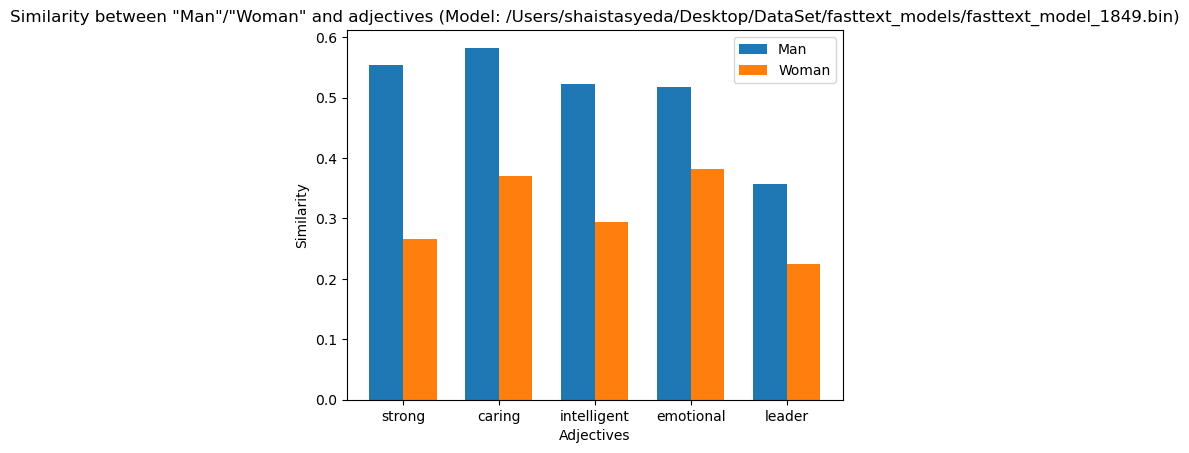

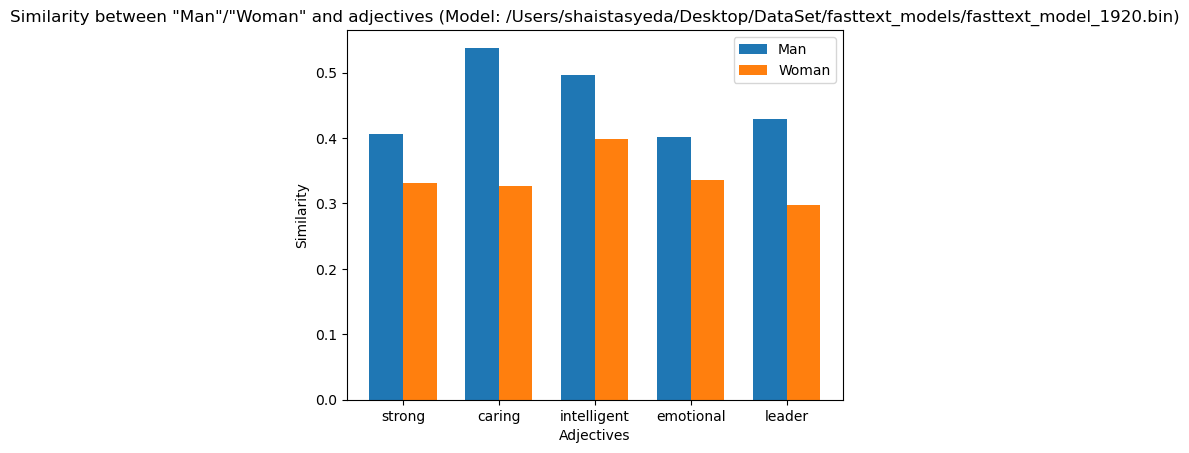

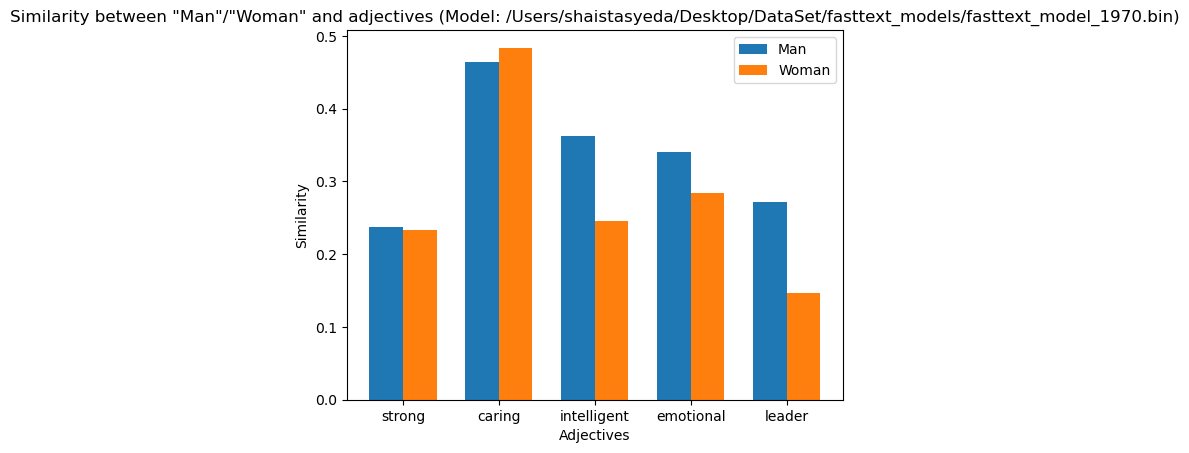

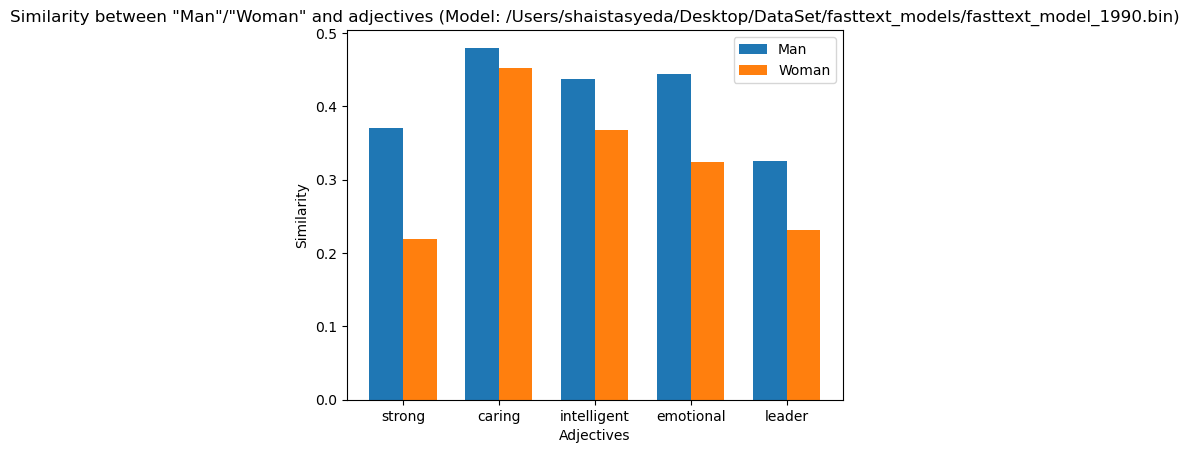

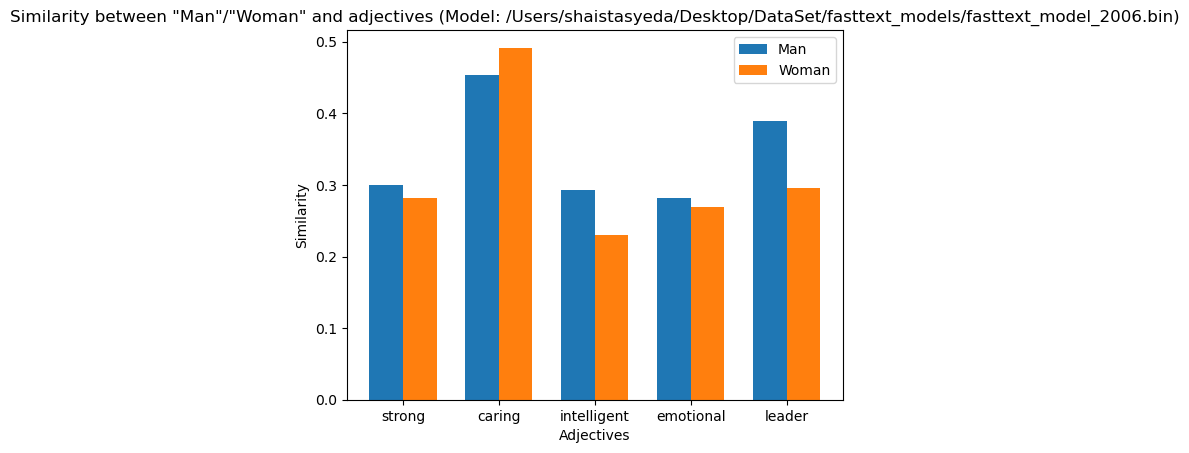

In [26]:
# Iterate through each model
for model_path in model_paths:
    # Load model
    model = fasttext.load_model(model_path)

    # Store similarities
    similarities_man = []
    similarities_woman = []

    for adj in adjectives:
        sim_man = similarity(model, "man", adj)
        sim_woman = similarity(model, "woman", adj)
        similarities_man.append(sim_man)
        similarities_woman.append(sim_woman)
        
     # Plotting
    fig, ax = plt.subplots()
    index = range(len(adjectives))
    bar_width = 0.35

    bar1 = ax.bar(index, similarities_man, bar_width, label='Man')
    bar2 = ax.bar([i + bar_width for i in index], similarities_woman, bar_width, label='Woman')

    ax.set_xlabel('Adjectives')
    ax.set_ylabel('Similarity')
    ax.set_title(f'Similarity between "Man"/"Woman" and adjectives (Model: {model_path})')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(adjectives)
    ax.legend()

    plt.show()   

# Temporal Analysis

In [36]:
model_paths = [
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1849.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1920.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1970.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_1990.bin',
    '/Users/shaistasyeda/Desktop/DataSet/fasttext_models/fasttext_model_2006.bin'
]
time_periods = ['1800-1849', '1850-1920','1921-1970','1971-1990','1991-2006']

In [37]:
import fasttext
from scipy.spatial.distance import cosine

In [38]:
def similarity(model, word1, word2):
    vec1 = model.get_word_vector(word1)
    vec2 = model.get_word_vector(word2)
    return 1 - cosine(vec1, vec2)

In [39]:
# Store results
results = {'man': [], 'woman': []}

In [40]:
for model_path in model_paths:
    model = fasttext.load_model(model_path)
    results['man'].append(similarity(model, 'man', 'strong'))
    results['woman'].append(similarity(model, 'woman', 'strong'))

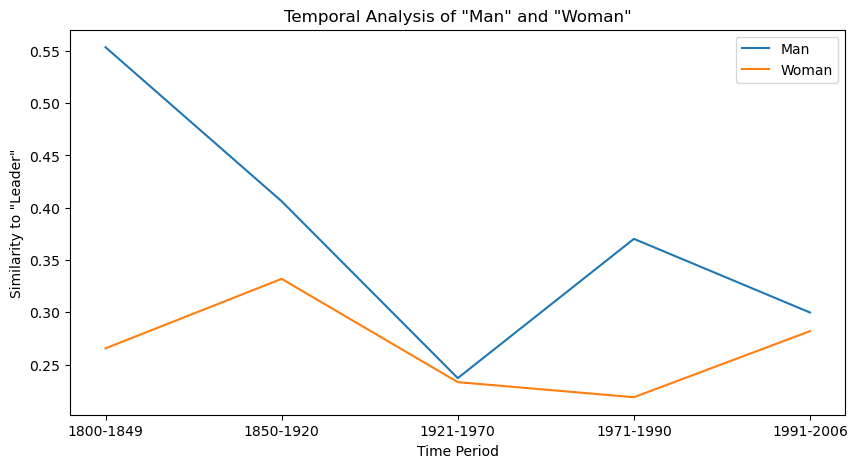

In [41]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time_periods, results['man'], label='Man')
plt.plot(time_periods, results['woman'], label='Woman')
plt.xlabel('Time Period')
plt.ylabel('Similarity to "Leader"')
plt.title('Temporal Analysis of "Man" and "Woman"')
plt.legend()
plt.show()